# HomeWork 4


1. 아이디 인덱스(학생 아이디의 마지막 세 자리)에 해당하는 “고양이와 개” 데이터의 증강 이미지 10장을 제시합니다.  
   고양이와 개 이미지 모두 제시하세요. 따라서 총 20개의 이미지를 제시해야 합니다.  
   예를 들어, 내 ID = 9703846입니다. 따라서 제 경우에는 인덱스가 “846”이지만 여러분의 경우에는 다를 수 있습니다. 
   고유한 아이디와 색인을 사용하세요.  
2. IMDB, Reuters 및 Boston Housing 데이터에 대해 딥 러닝을 실행하세요.   
   각 데이터에 대한 테스트 데이터 정확도를 입력합니다. 
   Boston Housing의 경우 정확도 대신 MSE 값을 입력합니다. 
3. 앞의 두 문제의 경우 코드는 닷 파이 파일로, 출력 텍스트는 닷 텍스트 파일로 제공해 주세요.

In [1]:
# data curing

import os, shutil

#download here : https://www.microsoft.com/en-us/download/details.aspx?id=54765
original_dataset_dir = 'C:\github\Assignment_archive\Data\PetImages'

base_dir = 'C:\github\Assignment_archive\Data\cats_and_dogs_small'
os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)


fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    fn1 = fname.replace('cat.','')
    src = os.path.join(original_dataset_dir+"/Cat/", fn1)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    fn1 = fname.replace('cat.','')
    src = os.path.join(original_dataset_dir+"/Cat/", fn1)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    fn1 = fname.replace('cat.','')
    src = os.path.join(original_dataset_dir+"/Cat/", fn1)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    fn1 = fname.replace('dog.','')
    src = os.path.join(original_dataset_dir+"/Dog/", fn1)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    fn1 = fname.replace('dog.','')
    src = os.path.join(original_dataset_dir+"/Dog/", fn1)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    fn1 = fname.replace('dog.','')
    src = os.path.join(original_dataset_dir+"/Dog/", fn1)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


In [11]:
import tensorflow as tf
print(tf.__version__)

2.11.0


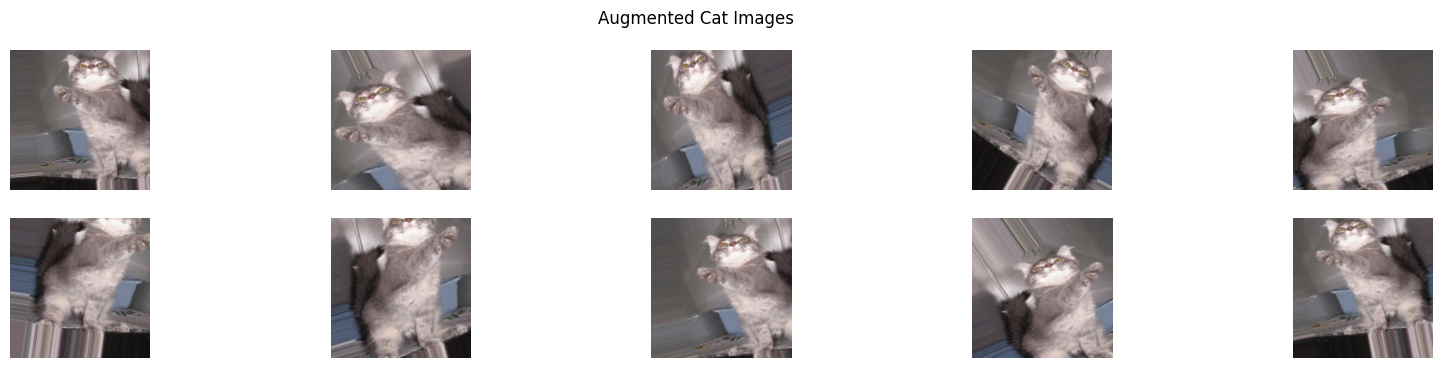

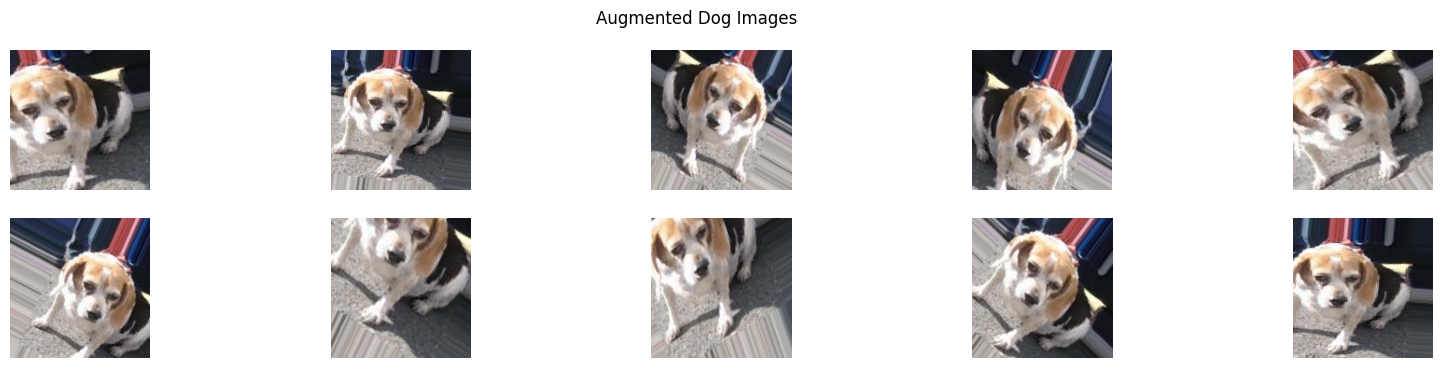

In [20]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# 베이스 디렉토리 설정
base_dir = r'C:\github\Assignment_archive\Data\cats_and_dogs_small'
train_dir = os.path.join(base_dir, 'train')

# 고양이와 개 이미지 경로 설정
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# 이미지 데이터 증강 설정
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 531번째 고양이와 개 이미지 파일 선택
cat_fnames = sorted([os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))])
dog_fnames = sorted([os.path.join(train_dogs_dir, fname) for fname in os.listdir(train_dogs_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))])

# 인덱스가 유효한지 확인
if len(cat_fnames) > 530 and len(dog_fnames) > 530:
    cat_img_path = cat_fnames[530- 49] 
    dog_img_path = dog_fnames[530- 49] 
else:
    raise ValueError("531번째 이미지를 찾을 수 없습니다. 이미지 파일이 충분하지 않습니다.")

# 이미지를 로드하고 배열로 변환
def load_and_process_image(img_path):
    img = load_img(img_path, target_size=(150, 150))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    return x

cat_img_array = load_and_process_image(cat_img_path)
dog_img_array = load_and_process_image(dog_img_path)

# 증강 이미지 시각화 함수
def plot_augmented_images(img_array, title):
    i = 0
    plt.figure(figsize=(20, 4))
    for batch in datagen.flow(img_array, batch_size=1):
        plt.subplot(2, 5, i + 1)
        imgplot = plt.imshow(batch[0].astype('uint8'))
        plt.axis('off')
        i += 1
        if i % 10 == 0:
            break
    plt.suptitle(title)
    plt.show()

# 10개의 증강된 이미지 시각화
plot_augmented_images(cat_img_array, 'Augmented Cat Images')
plot_augmented_images(dog_img_array, 'Augmented Dog Images')


In [ ]:
# IMDB Dataset: Sentiment Analysis
# testing code
'''
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

# Load IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

# Preprocess the data: Pad sequences
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen)
x_test = pad_sequences(x_test, maxlen=maxlen)

# Build the model
model_imdb = Sequential()
model_imdb.add(Embedding(10000, 128, input_length=maxlen))
model_imdb.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model_imdb.add(Dense(1, activation='sigmoid'))

# Compile the model
model_imdb.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model_imdb.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Evaluate the model
imdb_test_loss, imdb_test_acc = model_imdb.evaluate(x_test, y_test)
print(f'IMDB Test Accuracy: {imdb_test_acc:.4f}')
'''


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1
1641221/1641221 [==============================] - 0s 0us/

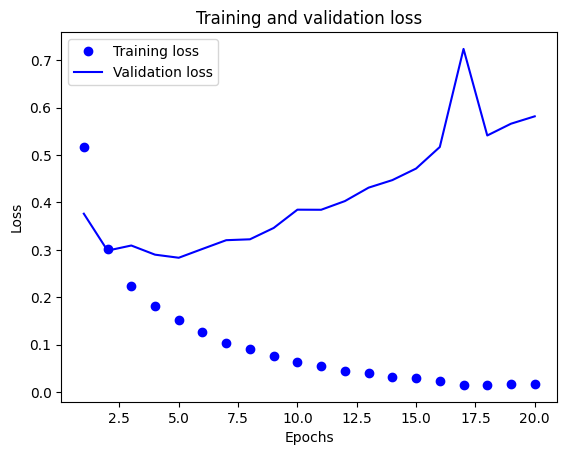

In [22]:
# IMDB Dataset: Sentiment Analysis

from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

word_index = imdb.get_word_index()

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train, 
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [24]:
# Reuters 
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(train_data[0])
print(train_labels[0])

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

print(decoded_review)

import numpy as np


def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

from keras.utils.np_utils import to_categorical
one_hot_train_labs = to_categorical(train_labels)
one_hot_test_labs  = to_categorical(test_labels)

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          one_hot_train_labs, 
          epochs=20,
          batch_size=512,
          )   

results = model.evaluate(x_test,one_hot_test_labs)

print ("Final Results = ", results)

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
3
? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3
Epoch 1/20
18/18 [==============================] - 1s 13ms/step - loss: 2.5541 - accuracy: 0.4957
Epoch 2/20
18/18 [==============================] - 0s 15ms/step - loss: 1.5003 - accuracy: 0.6694
Epoch 3/20
18/18 [==============================] -

57026/57026 [==============================] - 0s 2us/step
TR shape :  (404, 13)
TE shape :  (102, 13)
TR target shape :  (404,)
TE target shape :  (102,)
[3.74511057e+00 1.14801980e+01 1.11044307e+01 6.18811881e-02
 5.57355941e-01 6.26708168e+00 6.90106436e+01 3.74027079e+00
 9.44059406e+00 4.05898515e+02 1.84759901e+01 3.54783168e+02
 1.27408168e+01]


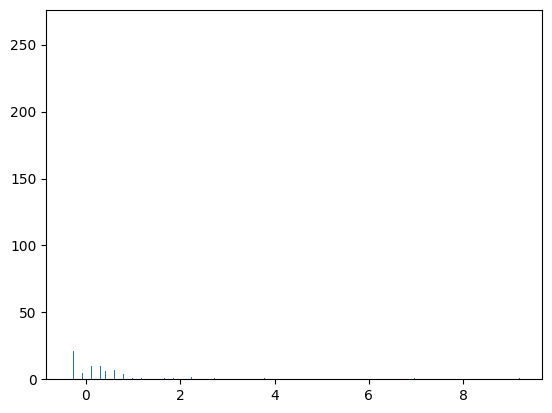

In [25]:
#Boston Housing 
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
print("TR shape : ", train_data.shape)
print("TE shape : ", test_data.shape)

print("TR target shape : ", train_targets.shape)
print("TE target shape : ",test_targets.shape)

acronyms    = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
                'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
definitions = ['per capita crime rate', 
               'proportion of residential land zoned for lots over 25,000 sq.ft.',
               'proportion of non-retail business acres per town',
               'Charles River dymmy variable (=1 if tract bounds river; 0 otherwise)',
               'nitric oxides concentration (parts per 10 million)',
               'The average number of rooms per dwelling',
               'The proportion of owner-occupied units built prior to 1940',
               'weighted distances to five Boston employment centers',
               'full-value property-tax rate per $10,000',
               'pupil-teacher ratio by town',
               '1000*(Bk-0.63)**2 where Bk is the proportion of blacks by town',
               'percentage lower status of the population']

crim = []
zn   = []
tget = []

mean = train_data.mean(axis=0)
print(mean)

train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

import numpy as np

for i in range(len(train_data)):
    crim.append(train_data[i][0])
    zn.append(train_data[i][1])
    tget.append(train_data[i][2])

y, binEdges = np.histogram(crim, bins = 100)
bincenters = 0.5 * (binEdges[1:]+binEdges[:-1])
width = 0.0099

import matplotlib.pyplot as plt
plt.bar(bincenters, y, width)
plt.show()

data =  [[1.23247e+00 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.96900e+02
  1.87200e+01]
 [2.17700e-02 8.25000e+01 2.03000e+00 ... 1.47000e+01 3.95380e+02
  3.11000e+00]
 [4.89822e+00 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.75520e+02
  3.26000e+00]
 ...
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 [2.14918e+00 0.00000e+00 1.95800e+01 ... 1.47000e+01 2.61950e+02
  1.57900e+01]
 [1.43900e-02 6.00000e+01 2.93000e+00 ... 1.56000e+01 3.76700e+02
  4.38000e+00]]
Epoch 1/100
404/404 [==============================] - 0s 549us/step - loss: 155.3775 - mae: 8.8945
Epoch 2/100
404/404 [==============================] - 0s 541us/step - loss: 20.2223 - mae: 3.1303
Epoch 3/100
404/404 [==============================] - 0s 680us/step - loss: 16.4083 - mae: 2.8284
Epoch 4/100
404/404 [==============================] - 0s 540us/step - loss: 14.3890 - mae: 2.5897
Epoch 5/100
404/404 [==============================] - 0s 538us/step - loss: 13.5716 - mae: 2.4716
Epoc

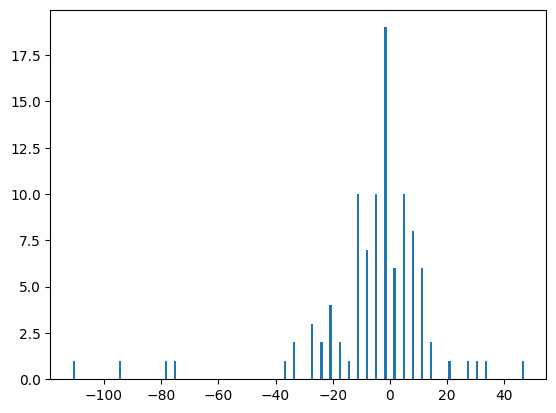

In [26]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print("data = ", train_data)

mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) # no activation to not have constraints
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

import numpy as np
model = build_model()
model.fit(train_data, train_targets, epochs=100, batch_size=1)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

predictions = model.predict(test_data)

Diff = []

for i in range(102) :
    percentdiff = (test_targets[i] - predictions[i][0])/test_targets[i] * 100.0
    Diff.append(percentdiff)

y, binEdges = np.histogram(Diff, bins = 50)
bincenters = 0.5 * (binEdges[1:]+binEdges[:-1])
import matplotlib.pyplot as plt
plt.bar(bincenters, y)
plt.show()